# XGBoost Classification of CRC Fibroblasts Based on CAFs Clustering
### PI Kristian Pietras, Lund University
#### Nikolay Oskolkov, SciLifeLab, NBIS Long Term Support, [nikolay.oskolkov@scilifelab.se](nikolay.oskolkov@scilifelab.se)

<h3><center>Abstract</center></h3>
In this report we will perform supervised classification of 17 Fibroblast cells from whole Colorectal Tumor (CRC) based on Gradient Boosting algorithm trained on 4 clusters obtained by tSNE unsupervised clustering on Cancer Associated Fibroblasts (CAFs) cells. We will perform hyper parameter tuning and predict which of the 4 CAFs clusters each of the 17 CRC Fibroblasts belongs to.
### Table of Contents:
* [Prepare CAFs Daya for Training](#Prepare CAFs Daya for Training)
* [Training XGBoost on CAFs Data](#Training XGBoost on CAFs Data)
* [Predict CRC Fibroblast Data](#Predict CRC Fibroblast Data)

### Prepare CAFs Data for Training <a class="anchor" id="Prepare CAFs Daya for Training"></a>

First of all let us read the RPKM normalized CAFs data set, check its dimensions and how it looks like:

In [1]:
import os
import pandas as pd
os.chdir("/home/nikolay/WABI/K_Pietras/CRC/")
cafs = pd.read_csv('CAFs_XGBoost.txt',sep='\t')
cafs.shape

(716, 9202)

In [2]:
cafs.iloc[0:9, 0:11]

,TRAPPC2,KIAA0141,KIAA1841,C17orf49,NCBP2.AS2,C2orf68,C1orf123,C21orf59,C11orf58,TGIF2.C20orf24,KIAA0391
SS2_15_0048_A3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.292250,0.000000,0.000000
SS2_15_0048_A6,0.000000,0.000000,0.000000,19.807819,0.000000,0.000000,0.000000,0.000000,132.429416,0.000000,0.000000
SS2_15_0048_A5,0.000000,2.190080,0.000000,0.000000,0.000000,0.000000,0.000000,76.368453,0.000000,55.859441,0.000000
SS2_15_0048_A4,0.000000,3.314831,19.843349,28.724288,76.155489,1.611635,110.748706,0.000000,69.348639,0.000000,31.204662
SS2_15_0048_A1,33.807347,87.979006,0.000000,0.000000,0.000000,0.000000,12.996538,31.776145,86.389846,63.388776,3.509337
SS2_15_0048_A2,0.000000,40.664199,0.000000,4.194892,20.019129,15.533953,0.000000,0.000000,35.057308,61.736140,0.000000
SS2_15_0048_A8,0.000000,91.342404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.646703,0.000000
SS2_15_0048_A9,0.000000,0.000000,0.000000,0.000000,0.000000,24.157538,0.000000,0.000000,3.331727,0.000000,0.000000
SS2_15_0048_A7,86.855327,0.000000,0.000000,76.880237,4.081813,0.000000,23.227646,0.000000,0.000000,130.282991,0.000000


In Machine Learning tradition, the last column called CLUSTER contains the code of the CAFs cluster (from 0 to 3), which we obtained from the previous tSNE visual inspection:

In [3]:
cafs.iloc[1:10, 9190:9202]

,ZSWIM4,ZSWIM7,ZSWIM8,ZUFSP,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,CLUSTER
SS2_15_0048_A6,0.000000,0.000000,0.000000,9.803362,0.0,0.000000,0.0,0.000000,0.000000,107.820884,2.771318,0
SS2_15_0048_A5,0.000000,0.000000,1.624980,0.000000,0.0,0.000000,0.0,0.000000,0.000000,58.741079,0.000000,0
SS2_15_0048_A4,1.717644,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,162.487968,1.339608,1
SS2_15_0048_A1,6.181426,0.000000,5.532035,0.000000,0.0,64.149579,0.0,15.589815,0.000000,58.155620,0.301310,0
SS2_15_0048_A2,0.000000,104.426024,11.314396,62.284558,0.0,62.477109,0.0,23.813795,28.868918,89.993856,3.227997,1
SS2_15_0048_A8,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,29.384513,0.000000,1
SS2_15_0048_A9,0.000000,0.000000,5.376408,0.000000,0.0,0.000000,0.0,5.659361,0.000000,21.062643,0.000000,3
SS2_15_0048_A7,0.000000,35.930265,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,386.979674,0.000000,0
SS2_15_0048_A10,0.000000,0.000000,53.170728,0.000000,0.0,45.019302,0.0,0.000000,0.000000,58.913671,0.000000,0


Now let us build X (the gene expression data set) and Y (labels) variables and split them into train and test data sets:

In [4]:
import numpy as np
from sklearn.preprocessing import label_binarize
X = cafs.values[:,0:9201]
Y = cafs.values[:,9201]
#Y = label_binarize(Y, classes=[0, 1, 2, 3])
print("Here is how Y lookes like after conversion to categorical variable:")
print(Y[0:10])
print()

Here is how Y lookes like after conversion to categorical variable:
[0. 0. 0. 1. 0. 1. 1. 3. 0. 0.]



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("The dimensions of X_train and Y_train are",X_train.shape,"\b and",Y_train.shape,"\b, respectively")
print("The dimensions of X_test and Y_test are",X_test.shape,"\b and",Y_test.shape,"\b, respectively")

The dimensions of X_train and Y_train are (572, 9201)  and (572,) , respectively
The dimensions of X_test and Y_test are (144, 9201)  and (144,) , respectively


Now everything is ready for the Machine Learning Gradient Boosting algorithm to start.

### Training XGBoost on CAFs Data <a class="anchor" id="Training XGBoost on CAFs Data"></a>

Before using Gradient Boosting, we have to optimize its hyperparameters. Here we will perform grid search (for number of trees, depth of forest and learning rate) K-fold cross-validation procedure to optimize XGBoost:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

n_estimators = [100, 150, 200, 300]
max_depth = [2, 4, 6, 8]
learning_rate = [0.01, 0.1, 0.2, 0.3]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate = learning_rate)

import time
start_time = time.time()

model = XGBClassifier(nthread = 4)
kfold = StratifiedKFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(model, param_grid, scoring = "f1_weighted", n_jobs = 1, cv = kfold, verbose = 1)
grid_result = grid.fit(X_train, Y_train)

#Collect results and display best combination of hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print()
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
stop_time = time.time()
print()
print("It took {0} seconds for the program to run".format(stop_time - start_time))

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [7]:
print('Optimized Hyperparameters:')
print('=================================================')
n_estimators = grid_result.best_params_['n_estimators']
max_depth = grid_result.best_params_['max_depth']
learning_rate = grid_result.best_params_['learning_rate']
print('Number of Trees:', n_estimators)
print('Depth of Forest:', max_depth)
print('Learning Rate:', learning_rate)

Optimized Hyperparameters:
Number of Trees: 150
Depth of Forest: 4
Learning Rate: 0.1


Now we will use K-fold cross-validation procedure in order to estimate the variation in accuracy of prediction of XGBoost on the training data:

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits = 10, shuffle = True)
cvscores = []
for train, test in kfold.split(X, Y):
    model = XGBClassifier(max_depth = max_depth, learning_rate = learning_rate, n_estimators = n_estimators, nthread = 4)
    model.fit(X[train], Y[train])
    results = cross_val_score(model, X[train], Y[train], cv = kfold)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #scores = model.evaluate(X[test], Y[test], verbose=0)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(results.mean()*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Accuracy: 97.66% (1.73%)
Accuracy: 96.75% (2.01%)
Accuracy: 97.03% (2.37%)
Accuracy: 98.31% (1.44%)
Accuracy: 97.83% (1.25%)
Accuracy: 97.98% (1.56%)
Accuracy: 97.68% (1.57%)
Accuracy: 97.05% (1.74%)
Accuracy: 97.69% (1.83%)
Accuracy: 97.52% (1.85%)
97.55% (+/- 0.45%)


Previous accuracy was calculated on the training set via cross-validation procedure. Now we will make ultimate prediction using the test / unseen data set:

In [9]:
model = XGBClassifier(max_depth = max_depth, learning_rate = learning_rate, n_estimators = n_estimators, nthread = 4)
model.fit(X_train, Y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.61%


We can visualize the accuracy as a confusion matrix:

Confusion matrix
[[94  1  0  0]
 [ 0 35  0  0]
 [ 0  0  7  0]
 [ 1  0  0  6]]


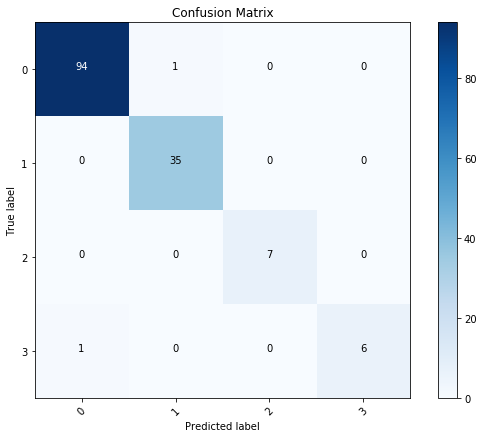

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confm = confusion_matrix(Y_test, predictions)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(confm, classes=['0', '1', '2', '3'],
                      title='Confusion Matrix')
plt.show()

We can use the trained XGBoost classifier to rank genes by their importance, i.e. by how much they explain variation in gene expression between individuals belonging to the 4 CAFs clusters:

In [11]:
import xgboost as xgb
param = {'max_depth': max_depth, 'learning_rate': learning_rate, 'n_estimators': n_estimators}
param['nthread'] = 4
param['eval_metric'] = 'auc'
dtrain = xgb.DMatrix( X_train, label = Y_train, feature_names = list(cafs.columns[0:9201]))
model = xgb.train(param.items(), dtrain)

import operator
print(sorted(model.get_score().items(), key=operator.itemgetter(1), reverse = True))

[('NUF2', 10), ('RGS5', 10), ('ASPM', 10), ('C17orf49', 10), ('ATP1B2', 8), ('SERPING1', 7), ('PDPN', 7), ('CDC25C', 6), ('AUP1', 6), ('CP', 3), ('FBLN1', 2), ('CTSK', 2), ('CDK1', 2), ('UHRF1', 2), ('CLMP', 2), ('GATA3', 1), ('LY6E', 1), ('ADAM19', 1)]


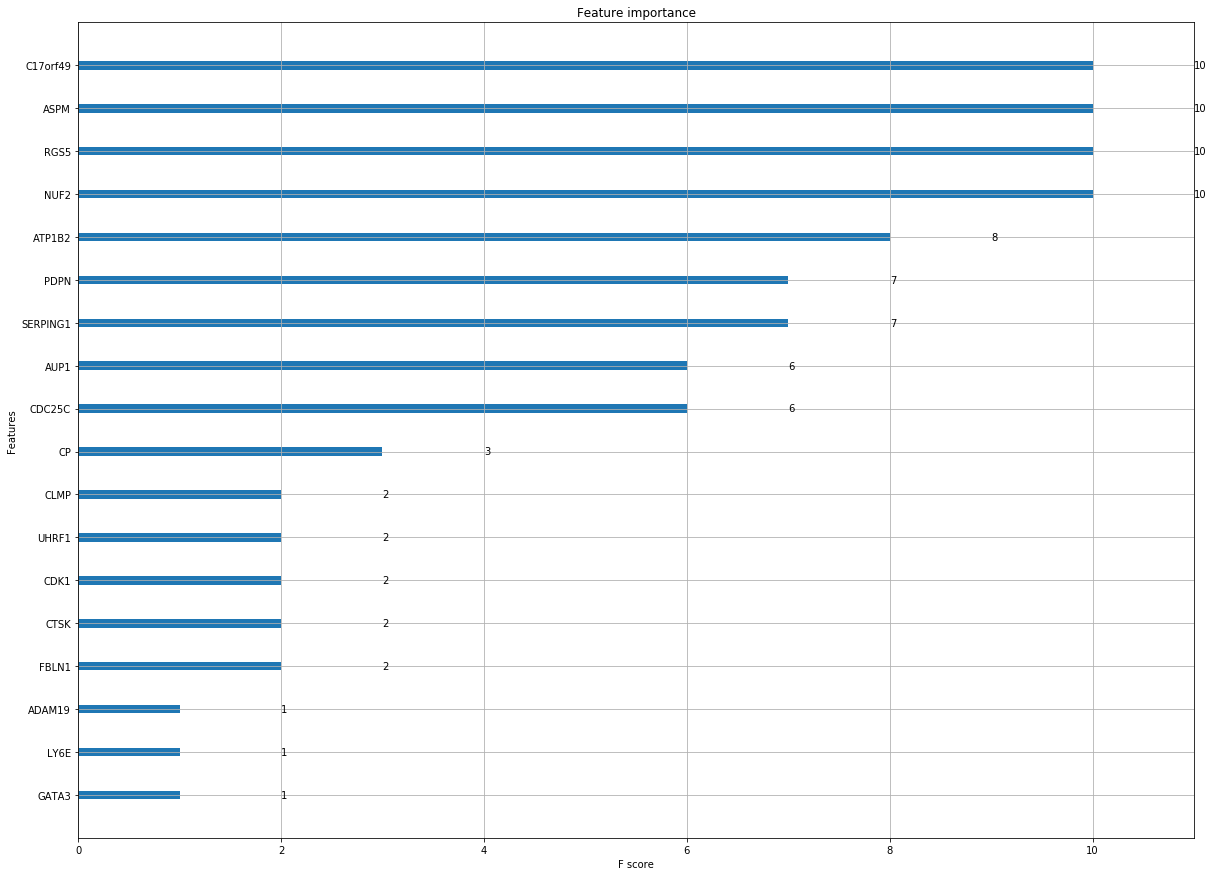

In [12]:
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [20, 15]
xgb.plot_importance(model, max_num_features = 20)
pyplot.show()

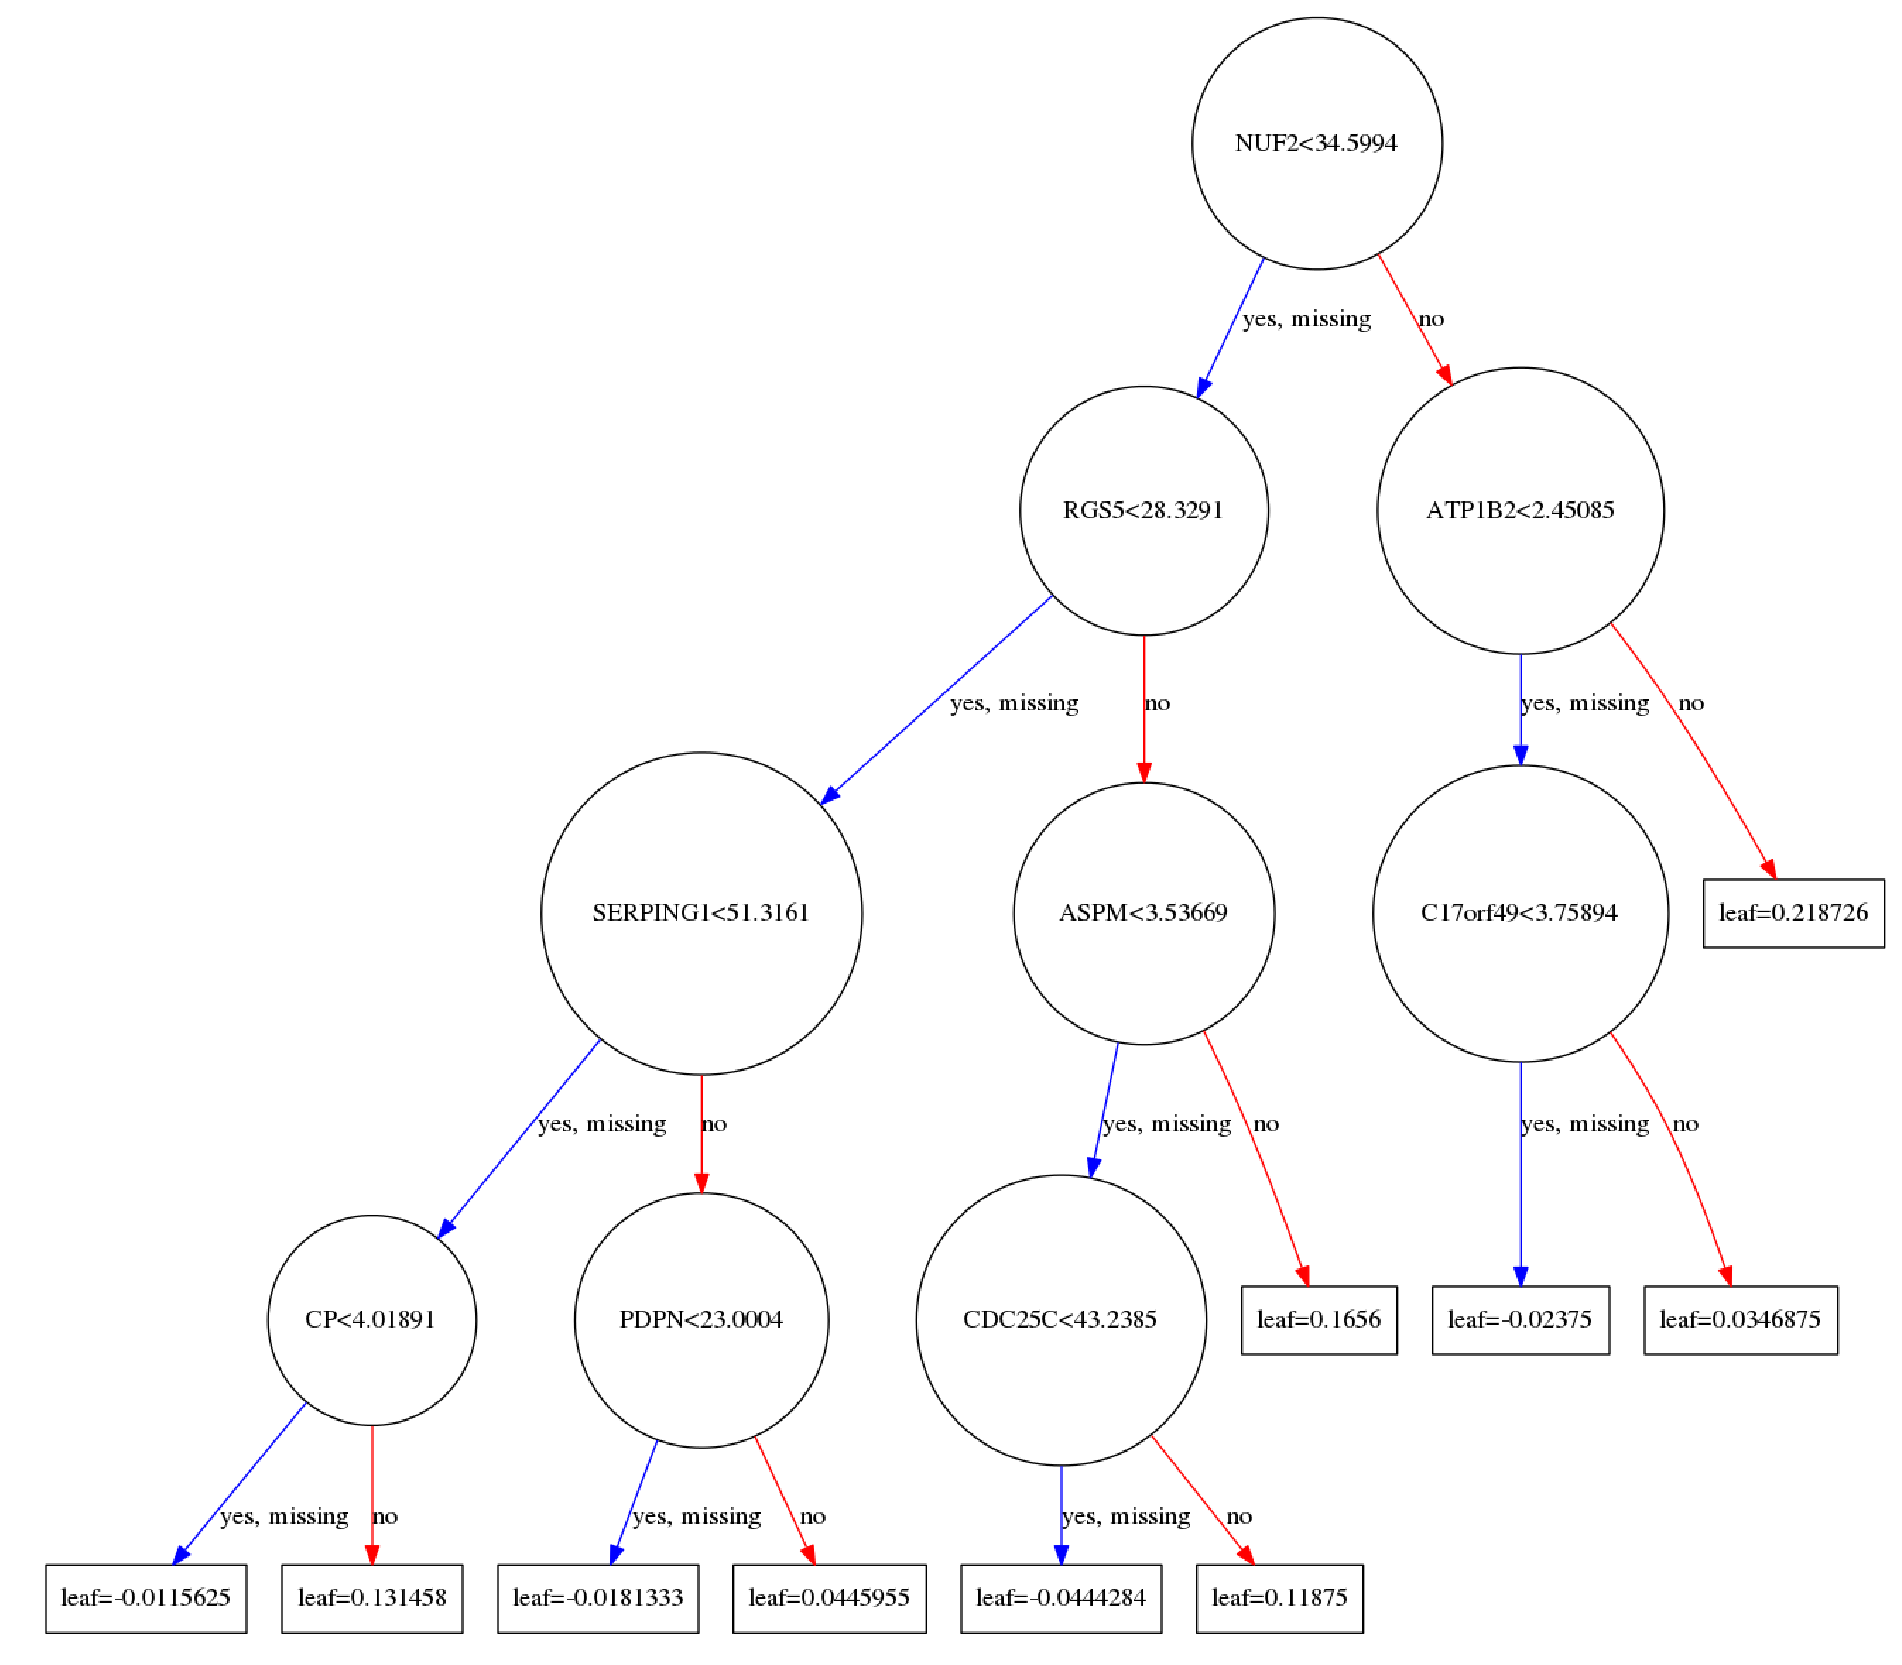

In [13]:
pyplot.rcParams['figure.figsize'] = [40, 30]
xgb.plot_tree(model, num_trees = 1)
pyplot.show()

### Predict CRC Fibroblast Data <a class="anchor" id="Predict CRC Fibroblast Data"></a>

Now we will use the trained XGBoost classifier and predict the what CAFs cluster the CRC Fibroblasts belong to. 

In [14]:
crc_fibro = pd.read_csv('CRC_FIBRO_RF.txt',sep='\t')
crc_fibro.shape

(17, 9201)

In [15]:
crc_fibro.iloc[0:9, 0:10]

,TRAPPC2,KIAA0141,KIAA1841,C17orf49,NCBP2.AS2,C2orf68,C1orf123,C21orf59,C11orf58,TGIF2.C20orf24
RHC3835__Fibroblast__#FB4E09,0.00000,0.00000,0.000000,0.00,0,2.32799,0.0000,0.00000,0.00000,0
RHC3843__Fibroblast__#FB4E09,0.00000,0.00000,0.000000,0.00,0,96.29190,0.0000,0.00000,60.95050,0
RHC3847__Fibroblast__#FB4E09,0.00000,0.00000,0.496502,136.23,0,12.80710,100.6160,4.35337,3.04987,0
RHC3851__Fibroblast__#FB4E09,8.19411,0.00000,0.000000,0.00,0,40.90800,233.6110,10.52290,60.58110,0
RHC3885__Fibroblast__#FB4E09,235.70600,0.00000,0.000000,0.00,0,5.26475,17.8877,20.42990,898.74000,0
RHC3890__Fibroblast__#FB4E09,0.00000,17.56380,172.698000,0.00,0,14.17840,0.0000,0.00000,888.79700,0
RHC3895__Fibroblast__#FB4E09,0.00000,0.00000,0.000000,0.00,0,6.10168,0.0000,0.00000,1030.04000,0
RHC4128__Fibroblast__#FB4E09,0.00000,0.00000,0.000000,0.00,0,9.44412,0.0000,26.93240,1313.63000,0
RHC4165__Fibroblast__#FB4E09,0.00000,7.43869,0.000000,0.00,0,6.40254,0.0000,0.00000,0.00000,0


In [16]:
model = XGBClassifier(max_depth = max_depth, learning_rate = learning_rate, n_estimators = n_estimators, nthread = 4)
model.fit(X_train, Y_train)
crc_fibro_pred = model.predict(crc_fibro.values)
crc_fibro_predictions = [round(value) for value in crc_fibro_pred]
print(crc_fibro_predictions)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [17]:
crc_fibro_pred_prob = model.predict_proba(crc_fibro.values)
print(crc_fibro_pred_prob)

[[9.54637825e-01 5.83129469e-03 3.56984288e-02 3.83244571e-03]
 [9.97270644e-01 8.96394660e-04 1.27686479e-03 5.56021230e-04]
 [7.90353358e-01 1.90790981e-01 1.17521528e-02 7.10355351e-03]
 [9.89896536e-01 3.31029086e-03 4.22187895e-03 2.57129478e-03]
 [1.18808083e-01 8.48418593e-01 1.83628462e-02 1.44104855e-02]
 [9.98276353e-01 4.65420511e-04 7.73501291e-04 4.84713673e-04]
 [9.93757486e-01 1.66601606e-03 2.72017648e-03 1.85627071e-03]
 [3.89853060e-01 5.56209862e-01 3.61286812e-02 1.78083815e-02]
 [9.83910203e-01 1.64048059e-03 1.28935017e-02 1.55577529e-03]
 [9.90957022e-01 2.14490038e-03 4.66427905e-03 2.23381305e-03]
 [9.05896485e-01 8.00941586e-02 8.87836143e-03 5.13095316e-03]
 [5.28824687e-01 4.47573632e-01 1.18042007e-02 1.17974682e-02]
 [9.67343450e-01 2.40257438e-02 5.17163705e-03 3.45912063e-03]
 [9.98653769e-01 4.53336688e-04 4.30366403e-04 4.62469994e-04]
 [5.65985262e-01 4.02329564e-02 3.83411348e-01 1.03704501e-02]
 [9.35904324e-01 1.54561466e-02 4.36073095e-02 5.032187

In [18]:
names = list(crc_fibro.index)
print(dict(zip(names,crc_fibro_predictions)))

{'RHC3835__Fibroblast__#FB4E09': 0.0, 'RHC3843__Fibroblast__#FB4E09': 0.0, 'RHC3847__Fibroblast__#FB4E09': 0.0, 'RHC3851__Fibroblast__#FB4E09': 0.0, 'RHC3885__Fibroblast__#FB4E09': 1.0, 'RHC3890__Fibroblast__#FB4E09': 0.0, 'RHC3895__Fibroblast__#FB4E09': 0.0, 'RHC4128__Fibroblast__#FB4E09': 1.0, 'RHC4165__Fibroblast__#FB4E09': 0.0, 'RHC4169__Fibroblast__#FB4E09': 0.0, 'RHC4079__Fibroblast__#FB4E09': 0.0, 'RHC4769__Fibroblast__#FB4E09': 0.0, 'RHC4775__Fibroblast__#FB4E09': 0.0, 'RHC4797__Fibroblast__#FB4E09': 0.0, 'RHC5899__Fibroblast__#FB4E09': 0.0, 'RHC5991__Fibroblast__#FB4E09': 0.0, 'RHC6030__Fibroblast__#FB4E09': 0.0}


We conclude that 12 of the CRC Fibroblasts belong to the blue CAF cluster with probability over 90%, 1 cell (RHC3847) belongs to the blue CAF cluster with probability 79%, 1 cell (RHC3885) belongs to the red CAF cluster with probability 85%, and 3 cells (RHC4128, RHC5899 and RHC4769) have approximately equal 50% chance to belong to both blue and red CAF clusters.